In [1]:
%pip install tensorflow keras pandas numpy matplotlib scikit-learn scikeras scikit-image


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os
from kaggle.api.kaggle_api_extended import KaggleApi
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# Step 1: Download the dataset
os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)
kaggle_json_path = os.path.expanduser("~/.kaggle/kaggle.json")

if not os.path.exists(kaggle_json_path):
    raise FileNotFoundError("kaggle.json file not found. Please place it in the ~/.kaggle directory.")

os.chmod(kaggle_json_path, 0o600)

api = KaggleApi()
api.authenticate()

dataset = 'preetviradiya/covid19-radiography-dataset'
download_path = 'covid19-radiography-dataset'

if not os.path.exists(download_path):
    api.dataset_download_files(dataset, path=download_path, unzip=True)
    print("Dataset downloaded and extracted successfully.")


# Step 2: Load and prepare the data
data_dir = os.path.join(download_path, 'COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset/')

categories = ['COVID', 'NORMAL', 'Viral Pneumonia', 'Lung_Opacity']
img_size = 128

def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img = plt.imread(os.path.join(folder, filename))
        if img is not None:
            img = np.resize(img, (img_size, img_size, 3))
            images.append(img)
            labels.append(label)
    return images, labels

images = []
labels = []

for category in categories:
    folder_path = os.path.join(data_dir, category)
    category_images, category_labels = load_images_from_folder(folder_path, category)
    images.extend(category_images)
    labels.extend(category_labels)

images = np.array(images)
labels = np.array(labels)

label_to_index = {label: index for index, label in enumerate(categories)}
labels = np.array([label_to_index[label] for label in labels])

In [27]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Function to load and count images in each category
def count_images_in_category(folder):
    counts = {}
    for category in os.listdir(folder):
        category_path = os.path.join(folder, category)
        if os.path.isdir(category_path):
            counts[category] = len(os.listdir(category_path))
    return counts

# Directory path to your dataset
data_dir = 'path_to_your_dataset/COVID-19_Radiography_Dataset/'

# Count images in each category
category_counts = count_images_in_category(data_dir)

# Plot class distribution
plt.figure(figsize=(10, 5))
sns.barplot(x=list(category_counts.keys()), y=list(category_counts.values()))
plt.title('Class Distribution in Dataset')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()

# Check for any extreme imbalance
total_images = sum(category_counts.values())
for category, count in category_counts.items():
    print(f"Class: {category}, Count: {count}, Percentage: {count / total_images * 100:.2f}%")

# Visual inspection: Display random samples from each category
import random
from PIL import Image

def display_random_samples(data_dir, categories, img_size=128, num_samples=3):
    fig, axes = plt.subplots(len(categories), num_samples, figsize=(num_samples * 3, len(categories) * 3))
    for i, category in enumerate(categories):
        category_path = os.path.join(data_dir, category)
        samples = random.sample(os.listdir(category_path), num_samples)
        for j, sample in enumerate(samples):
            img_path = os.path.join(category_path, sample)
            img = Image.open(img_path).resize((img_size, img_size))
            axes[i, j].imshow(img)
            axes[i, j].axis('off')
            if j == 0:
                axes[i, j].set_title(category)
    plt.show()

# Display random samples
display_random_samples(data_dir, list(category_counts.keys()))

# If additional metadata is available
# For example, if there is metadata.csv with columns 'filename', 'age', 'gender', etc.
import pandas as pd

metadata_path = os.path.join(data_dir, 'metadata.csv')
if os.path.exists(metadata_path):
    metadata = pd.read_csv(metadata_path)
    # Analyze metadata for bias
    plt.figure(figsize=(10, 5))
    sns.countplot(x='gender', hue='class', data=metadata)
    plt.title('Gender Distribution Across Classes')
    plt.show()

    plt.figure(figsize=(10, 5))
    sns.countplot(x='age', hue='class', data=metadata)
    plt.title('Age Distribution Across Classes')
    plt.show()



FileNotFoundError: [Errno 2] No such file or directory: 'path_to_your_dataset/COVID-19_Radiography_Dataset/'

Epoch 1/10
379/379 ━━━━━━━━━━━━━━━━━━━━ 107s 275ms/step - accuracy: 0.6672 - loss: 0.8636 - val_accuracy: 0.6671 - val_loss: 0.8393
Epoch 2/10
379/379 ━━━━━━━━━━━━━━━━━━━━ 119s 310ms/step - accuracy: 0.6660 - loss: 0.8416 - val_accuracy: 0.6671 - val_loss: 0.8385
Epoch 3/10
379/379 ━━━━━━━━━━━━━━━━━━━━ 116s 302ms/step - accuracy: 0.6720 - loss: 0.8388 - val_accuracy: 0.6671 - val_loss: 0.8344
Epoch 4/10
379/379 ━━━━━━━━━━━━━━━━━━━━ 111s 289ms/step - accuracy: 0.6729 - loss: 0.8324 - val_accuracy: 0.6671 - val_loss: 0.8349
Epoch 5/10
379/379 ━━━━━━━━━━━━━━━━━━━━ 112s 292ms/step - accuracy: 0.6778 - loss: 0.8253 - val_accuracy: 0.6671 - val_loss: 0.8374
Epoch 6/10
379/379 ━━━━━━━━━━━━━━━━━━━━ 118s 308ms/step - accuracy: 0.6711 - loss: 0.8299 - val_accuracy: 0.6671 - val_loss: 0.8346
Epoch 7/10
379/379 ━━━━━━━━━━━━━━━━━━━━ 111s 289ms/step - accuracy: 0.6767 - loss: 0.8251 - val_accuracy: 0.6671 - val_loss: 0.8346
Epoch 8/10
379/379 ━━━━━━━━━━━━━━━━━━━━ 119s 311ms/step - accuracy: 0.6680 -

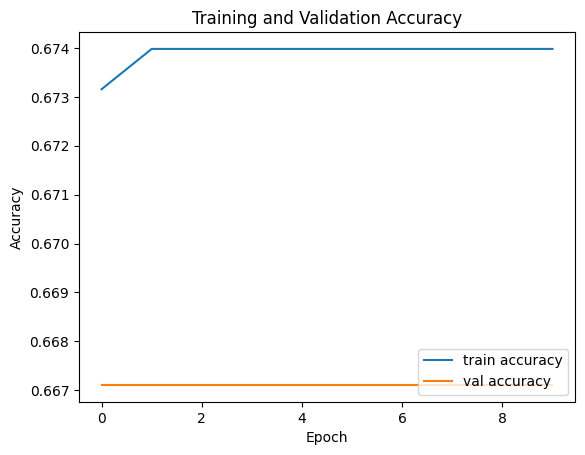

In [19]:

# Step 3: Split the data
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
y_train = to_categorical(y_train, num_classes=len(categories))
y_test = to_categorical(y_test, num_classes=len(categories))

# Step 4: Data Augmentation
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
test_generator = test_datagen.flow(X_test, y_test, batch_size=32)

# Step 5: Build the CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(categories), activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Step 6: Train the Model
history = model.fit(train_generator, epochs=10, validation_data=test_generator)

# Step 7: Evaluate the Model
loss, accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Step 8: Plot Training History
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()


Epoch 1/20
530/530 ━━━━━━━━━━━━━━━━━━━━ 1979s 4s/step - accuracy: 0.5987 - loss: 1.2066 - val_accuracy: 0.8179 - val_loss: 0.4845 - learning_rate: 0.0010
Epoch 2/20
530/530 ━━━━━━━━━━━━━━━━━━━━ 2488s 5s/step - accuracy: 0.7805 - loss: 0.5903 - val_accuracy: 0.8500 - val_loss: 0.4203 - learning_rate: 0.0010
Epoch 3/20
530/530 ━━━━━━━━━━━━━━━━━━━━ 1910s 4s/step - accuracy: 0.8072 - loss: 0.5247 - val_accuracy: 0.8741 - val_loss: 0.3470 - learning_rate: 0.0010
Epoch 4/20
530/530 ━━━━━━━━━━━━━━━━━━━━ 1773s 3s/step - accuracy: 0.8157 - loss: 0.5012 - val_accuracy: 0.8294 - val_loss: 0.4494 - learning_rate: 0.0010
Epoch 5/20
530/530 ━━━━━━━━━━━━━━━━━━━━ 1729s 3s/step - accuracy: 0.8229 - loss: 0.4628 - val_accuracy: 0.8254 - val_loss: 0.4592 - learning_rate: 0.0010
Epoch 6/20
530/530 ━━━━━━━━━━━━━━━━━━━━ 1722s 3s/step - accuracy: 0.8251 - loss: 0.4610 - val_accuracy: 0.8327 - val_loss: 0.4641 - learning_rate: 0.0010
Epoch 7/20
530/530 ━━━━━━━━━━━━━━━━━━━━ 1722s 3s/step - accuracy: 0.8481 - l

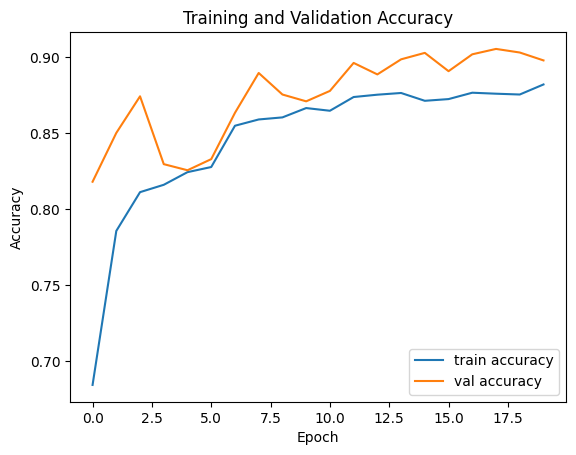

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from kaggle.api.kaggle_api_extended import KaggleApi
from PIL import Image

# Suppress TensorFlow optimization messages
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# Step 1: Download the dataset
os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)
kaggle_json_path = os.path.expanduser("~/.kaggle/kaggle.json")

if not os.path.exists(kaggle_json_path):
    raise FileNotFoundError("kaggle.json file not found. Please place it in the ~/.kaggle directory.")

os.chmod(kaggle_json_path, 0o600)

api = KaggleApi()
api.authenticate()

dataset = 'preetviradiya/covid19-radiography-dataset'
download_path = 'covid19-radiography-dataset'

if not os.path.exists(download_path):
    api.dataset_download_files(dataset, path=download_path, unzip=True)
    print("Dataset downloaded and extracted successfully.")

# Step 2: Define the data directory and categories
data_dir = os.path.join(download_path, 'COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset')
categories = ['COVID', 'NORMAL', 'Viral Pneumonia', 'Lung_Opacity']
img_size = 224  # Using 224x224 for pre-trained models

# Step 3: Pre-compute and save images and labels
def load_and_save_images(data_dir, categories, img_size, save_path):
    images = []
    labels = []
    for category in categories:
        folder_path = os.path.join(data_dir, category)
        label = categories.index(category)
        for filename in os.listdir(folder_path):
            img_path = os.path.join(folder_path, filename)
            try:
                img = Image.open(img_path).convert('RGB')
                img = img.resize((img_size, img_size))
                img = np.array(img)
                images.append(img)
                labels.append(label)
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")

    images = np.array(images)
    labels = np.array(labels)

    np.save(os.path.join(save_path, 'images.npy'), images)
    np.save(os.path.join(save_path, 'labels.npy'), labels)

# Check if pre-computed data exists, otherwise compute and save it
save_path = 'precomputed_data'
os.makedirs(save_path, exist_ok=True)

if not os.path.exists(os.path.join(save_path, 'images.npy')) or not os.path.exists(os.path.join(save_path, 'labels.npy')):
    load_and_save_images(data_dir, categories, img_size, save_path)

# Load pre-computed images and labels
images = np.load(os.path.join(save_path, 'images.npy'))
labels = np.load(os.path.join(save_path, 'labels.npy'))

# Encode labels
labels = to_categorical(labels, num_classes=len(categories))

# Step 4: Split the data
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Step 5: Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
test_generator = test_datagen.flow(X_test, y_test, batch_size=32)

# Step 6: Build the CNN Model using Pre-trained VGG16
def create_model(learning_rate=0.001, dropout_rate=0.5):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
    for layer in base_model.layers:
        layer.trainable = False

    model = Sequential([
        base_model,
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        GlobalAveragePooling2D(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(dropout_rate),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(dropout_rate),
        Dense(len(categories), activation='softmax')
    ])

    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create the model
model = create_model()

# Define callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=test_generator,
    callbacks=[reduce_lr, early_stopping]
)

# Evaluate the model using the test data
loss, accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Plot Training History
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()


In [ ]:
# Import necessary libraries
import numpy as np
import os
import cv2
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from skimage.feature import local_binary_pattern

# Define function to load images from folders
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename), cv2.IMREAD_GRAYSCALE)
        if img is not None:
            images.append(img)
    return images

# Paths to the dataset folders
covid_folder = 'assignment2/covid19-radiography-dataset/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset/COVID'
normal_folder = 'assignment2/covid19-radiography-dataset/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset/Normal'

# Load datasets
covid_images = load_images_from_folder(covid_folder)
normal_images = load_images_from_folder(normal_folder)

# Preprocess images (resize to 512x512)
def preprocess_images(images):
    preprocessed_images = []
    for img in images:
        resized_img = cv2.resize(img, (512, 512))
        preprocessed_images.append(resized_img)
    return preprocessed_images

covid_images = preprocess_images(covid_images)
normal_images = preprocess_images(normal_images)

# Feature extraction using ResExLBP
def extract_resexlbp_features(images):
    features = []
    for img in images:
        img_features = []
        for i in range(0, img.shape[0], 64):
            for j in range(0, img.shape[1], 64):
                patch = img[i:i+64, j:j+64]
                lbp = local_binary_pattern(patch, 8, 1, method='uniform')
                hist, _ = np.histogram(lbp, bins=np.arange(0, 27), range=(0, 26))
                img_features.extend(hist)
        features.append(img_features)
    return np.array(features)

covid_features = extract_resexlbp_features(covid_images)
normal_features = extract_resexlbp_features(normal_images)

# Combine features and labels
X = np.vstack((covid_features, normal_features))
y = np.hstack((np.ones(len(covid_features)), np.zeros(len(normal_features))))

# Feature selection using IRF (SelectKBest as a simple approach)
k_best = SelectKBest(mutual_info_classif, k=1459)
X_selected = k_best.fit_transform(X, y)

# Classification using SVM
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

svm = SVC(kernel='rbf', gamma='auto')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Cross-validation
kf = KFold(n_splits=10)
cv_scores = cross_val_score(svm, X_selected, y, cv=kf)
print("10-fold cross-validation accuracy: %.2f%%" % (cv_scores.mean() * 100))
